# Checkpoint Two: Exploratory Data Analysis

Now that your chosen dataset is approved, it is time to start working on your analysis. Use this notebook to perform your EDA and make notes where directed to as you work.

## Getting Started

Since we have not provided your dataset for you, you will need to load the necessary files in this repository. Make sure to include a link back to the original dataset here as well.

My dataset:

Your first task in EDA is to import necessary libraries and create a dataframe(s). Make note in the form of code comments of what your thought process is as you work on this setup task.

mo_mushrooms.csv

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style, figure
from wordcloud import WordCloud

mushrooms_df = pd.read_csv("mo_mushrooms.csv")
mushrooms_df.head(5) #first five rows reveals dataframe's columns and values

,id,id_raw,foray_key_raw,foray_key,fungi_name,fungi_name_raw,current_fungi_name,current_fungi_name_raw,common_name,common_name_raw,...,foray_date,foray_date_raw,foray_location,foray_location_raw,id_2,id_raw_2,month,month_1,month_raw,month_raw_1
0,2,2,75,2002/09/21 - Engelmann Woods,Daedaleopsis confragosa,Daedaleopsis confragosa,Daedaleopsis confragosa var. confragosa,Daedaleopsis confragosa var. confragosa,Blushing bracket,Blushing bracket,...,2002-09-21,2002-09-21 05:00:00,Engelmann Woods,Engelmann Woods,75,75,NaN,NaN,NaN,NaN
1,3,3,75,2002/09/21 - Engelmann Woods,Coprinus atramentarius,Coprinus atramentarius,Coprinopsis atramentaria,Coprinopsis atramentaria,NaN,NaN,...,2002-09-21,2002-09-21 05:00:00,Engelmann Woods,Engelmann Woods,75,75,NaN,NaN,NaN,NaN
2,4,4,75,2002/09/21 - Engelmann Woods,Galiella rufa,Galiella rufa,Galiella rufa,Galiella rufa,Hairy rubber cup,Hairy rubber cup,...,2002-09-21,2002-09-21 05:00:00,Engelmann Woods,Engelmann Woods,75,75,NaN,NaN,NaN,NaN
3,5,5,75,2002/09/21 - Engelmann Woods,Clavicorona pyxidata,Clavicorona pyxidata,Artomyces pyxidatus,Artomyces pyxidatus,Crown-tipped Coral,Crown-tipped Coral,...,2002-09-21,2002-09-21 05:00:00,Engelmann Woods,Engelmann Woods,75,75,NaN,NaN,NaN,NaN
4,6,6,75,2002/09/21 - Engelmann Woods,Trichaptum biformis,Trichaptum biformis,NaN,NaN,NaN,NaN,...,2002-09-21,2002-09-21 05:00:00,Engelmann Woods,Engelmann Woods,75,75,NaN,NaN,NaN,NaN


## Get to Know the Numbers

Now that you have everything setup, put any code that you use to get to know the dataframe and its rows and columns better in the cell below. You can use whatever techniques you like, except for visualizations. You will put those in a separate section.

When working on your code, make sure to leave comments so that your mentors can understand your thought process.

In [2]:
mushrooms_df.columns # explore columns

Index(['id', 'id_raw', 'foray_key_raw', 'foray_key', 'fungi_name',
       'fungi_name_raw', 'current_fungi_name', 'current_fungi_name_raw',
       'common_name', 'common_name_raw', 'id_1', 'id_raw_1', 'site_key_raw',
       'site_key', 'foray_date', 'foray_date_raw', 'foray_location',
       'foray_location_raw', 'id_2', 'id_raw_2', 'month', 'month_1',
       'month_raw', 'month_raw_1'],
      dtype='object')

In [3]:
mushrooms_df.dtypes

id                          int64
id_raw                      int64
foray_key_raw               int64
foray_key                  object
fungi_name                 object
fungi_name_raw             object
current_fungi_name         object
current_fungi_name_raw     object
common_name                object
common_name_raw            object
id_1                        int64
id_raw_1                    int64
site_key_raw                int64
site_key                   object
foray_date                 object
foray_date_raw             object
foray_location             object
foray_location_raw         object
id_2                        int64
id_raw_2                    int64
month                     float64
month_1                   float64
month_raw                 float64
month_raw_1               float64
dtype: object

In [4]:
mushrooms_df.isnull().sum()

id                           0
id_raw                       0
foray_key_raw                0
foray_key                    0
fungi_name                   0
fungi_name_raw               0
current_fungi_name         416
current_fungi_name_raw     416
common_name               3819
common_name_raw           3819
id_1                         0
id_raw_1                     0
site_key_raw                 0
site_key                     0
foray_date                   0
foray_date_raw               0
foray_location               3
foray_location_raw           3
id_2                         0
id_raw_2                     0
month                     8774
month_1                   8774
month_raw                 8774
month_raw_1               8774
dtype: int64

In [5]:
mushrooms_count = mushrooms_df['fungi_name'].value_counts()
mushrooms_count[:15] #top 15 most commonly foraged mushrooms

Stereum ostrea               171
Trametes versicolor          156
Auricularia auricula         134
Schizophyllum commune        126
Pluteus cervinus             116
Cantharellus cinnabarinus    103
Trichaptum biforme           102
Ganoderma applanatum          93
Cantharellus cibarius         90
Cantharellus lateritius       89
Ganoderma lucidum             85
Pleurotus ostreatus           81
Tremellodendron pallidum      80
Sarcoscypha occidentalis      79
Laetiporus sulphureus         74
Name: fungi_name, dtype: int64

In [6]:
location_count = mushrooms_df['foray_location'].value_counts()
location_count[:15] #top 15 most mushroom-abundant foraging locations

Mingo National Wildlife Refuge          2393
Babler State Park                       1087
Ha Ha Tonka State Park                   512
Hawn State Park                          462
Rockwood Reservation                     421
Meramec State Park                       399
Forest 44 Conservation Area              365
Cuivre River State Park                  305
Hazlet State Park                        213
Pickle Spring                            194
University of Missouri Forestry Camp     190
Creve Coeur County Park                  143
Lower Meramec Park                       138
Camp Latonka                             107
Tyson Research Center                    106
Name: foray_location, dtype: int64

In [7]:
mushrooms_month = mushrooms_df['foray_date'].value_counts()

mushrooms_month.head(15) #top 15 mushroom foray dates by number of mushrooms found

1999-08-14    158
2010-09-25    154
2016-09-30    125
1992-09-12    123
2012-09-29    118
2008-09-20    118
2005-09-24    118
2001-09-15    117
2013-10-05    115
2003-09-20    113
1993-09-18    112
2008-06-21    110
2009-06-27    103
1995-09-23    100
2006-09-16     95
Name: foray_date, dtype: int64

In [15]:
mushrooms_df['month'] = ''
mushrooms_df['genus'] = ''

# exploring dates by moving data from foray_date into new columns for analysis
for i in range(len(mushrooms_df['foray_date'])):
    mushrooms_df['month'][i] = mushrooms_df['foray_date'][i].split('-')[1]
    mushrooms_df['month'][i] = int(mushrooms_df['month'][i])
    

#exploring taxonomy by moving data from fungi_name into new columns for analysis
for i in range(len(mushrooms_df['fungi_name'])):
    mushrooms_df['genus'][i] = mushrooms_df['fungi_name'][i].split(' ')[0]
        
mushrooms_df.tail(10)

c:\users\kdh\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\kdh\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
c:\users\kdh\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

,id,id_raw,foray_key_raw,foray_key,fungi_name,fungi_name_raw,current_fungi_name,current_fungi_name_raw,common_name,common_name_raw,...,foray_date_raw,foray_location,foray_location_raw,id_2,id_raw_2,month,month_1,month_raw,month_raw_1,genus
8764,8786,8786,401,2019/09/22 - Creve Coeur County Park,Scutellinia scutellata,Scutellinia scutellata,Scutellinia scutellata,Scutellinia scutellata,Common eyelash,Common eyelash,...,2019-09-22 05:00:00,Creve Coeur County Park,Creve Coeur County Park,401,401,9,NaN,NaN,NaN,Scutellinia
8765,8787,8787,401,2019/09/22 - Creve Coeur County Park,Stereum ostrea,Stereum ostrea,Stereum ostrea,Stereum ostrea,False turkeytail,False turkeytail,...,2019-09-22 05:00:00,Creve Coeur County Park,Creve Coeur County Park,401,401,9,NaN,NaN,NaN,Stereum
8766,8788,8788,401,2019/09/22 - Creve Coeur County Park,Trametes aesculi,Trametes aesculi,-,-,NaN,NaN,...,2019-09-22 05:00:00,Creve Coeur County Park,Creve Coeur County Park,401,401,9,NaN,NaN,NaN,Trametes
8767,8789,8789,401,2019/09/22 - Creve Coeur County Park,Trametes hirsuta,Trametes hirsuta,Trametes hirsuta,Trametes hirsuta,Hairy bracket,Hairy bracket,...,2019-09-22 05:00:00,Creve Coeur County Park,Creve Coeur County Park,401,401,9,NaN,NaN,NaN,Trametes
8768,8790,8790,401,2019/09/22 - Creve Coeur County Park,Trametes versicolor,Trametes versicolor,Trametes versicolor,Trametes versicolor,Turkeytail,Turkeytail,...,2019-09-22 05:00:00,Creve Coeur County Park,Creve Coeur County Park,401,401,9,NaN,NaN,NaN,Trametes
8769,8791,8791,401,2019/09/22 - Creve Coeur County Park,Tyromyces chioneus,Tyromyces chioneus,Tyromyces chioneus,Tyromyces chioneus,White Cheese Polypore,White Cheese Polypore,...,2019-09-22 05:00:00,Creve Coeur County Park,Creve Coeur County Park,401,401,9,NaN,NaN,NaN,Tyromyces
8770,8792,8792,401,2019/09/22 - Creve Coeur County Park,Xylobolus frustulatus,Xylobolus frustulatus,Xylobolus frustulatus,Xylobolus frustulatus,Ceramic Parchment,Ceramic Parchment,...,2019-09-22 05:00:00,Creve Coeur County Park,Creve Coeur County Park,401,401,9,NaN,NaN,NaN,Xylobolus
8771,17584,17584,410,2019/09/07 - Saint Stauislaus Conservation Area,Pluteus americanus,Pluteus americanus,Pluteus americanus,Pluteus americanus,Willow shield,Willow shield,...,2019-09-07 05:00:00,NaN,NaN,410,410,9,NaN,NaN,NaN,Pluteus
8772,17585,17585,410,2019/09/07 - Saint Stauislaus Conservation Area,Pluteus cervinus,Pluteus cervinus,Pluteus cervinus,Pluteus cervinus,Deer shield,Deer shield,...,2019-09-07 05:00:00,NaN,NaN,410,410,9,NaN,NaN,NaN,Pluteus
8773,17586,17586,410,2019/09/07 - Saint Stauislaus Conservation Area,Cerioporus squamosus,Cerioporus squamosus,Polyporus squamosus,Polyporus squamosus,NaN,NaN,...,2019-09-07 05:00:00,NaN,NaN,410,410,9,NaN,NaN,NaN,Cerioporus


In [10]:
# total mushrooms found by month

months = range(1, 13)
months_named = ['JAN', 'FEB', 'MAR', 'APR',
               'MAY', 'JUNE', 'JULY', 'AUG',
               'SEP', 'OCT', 'NOV', 'DEC']
mushrooms_sums = []
mushrooms_months = {} # this dict will be used to create visualization

for num in months:
    try:
        mushrooms_sums.append(mushrooms_df['month'].value_counts()[num])
    except KeyError:
        mushrooms_sums.append(0)
        
for i in range(len(months)):
    print(f"{months_named[i]} : {mushrooms_sums[i]} Mushrooms Foraged")
    
for i in range(12):
    mushrooms_months[months_named[i]] = mushrooms_sums[i] # form key : value pairs for dict

JAN : 0 Mushrooms Foraged
FEB : 0 Mushrooms Foraged
MAR : 10 Mushrooms Foraged
APR : 544 Mushrooms Foraged
MAY : 236 Mushrooms Foraged
JUNE : 1387 Mushrooms Foraged
JULY : 1463 Mushrooms Foraged
AUG : 507 Mushrooms Foraged
SEP : 3033 Mushrooms Foraged
OCT : 1478 Mushrooms Foraged
NOV : 116 Mushrooms Foraged
DEC : 0 Mushrooms Foraged


## Visualize

Create any visualizations for your EDA here. Make note in the form of code comments of what your thought process is for your visualizations.

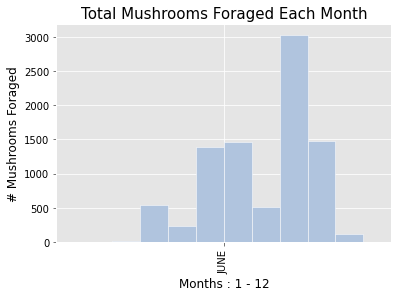

In [11]:
style.use('ggplot')
df_bar = pd.DataFrame(mushrooms_months, index = [months_named[5]])

ax = df_bar.plot.bar(width=1500, color = 'lightsteelblue',
                     edgecolor = "white", legend = False) 

plt.title('Total Mushrooms Foraged Each Month', color = 'black', fontsize = 15)
plt.xlabel("Months : 1 - 12", color = 'black')
plt.ylabel('# Mushrooms Foraged', color = 'black')
plt.xticks(color = 'black', rotation=90)
plt.yticks(color = 'black')
plt.show()

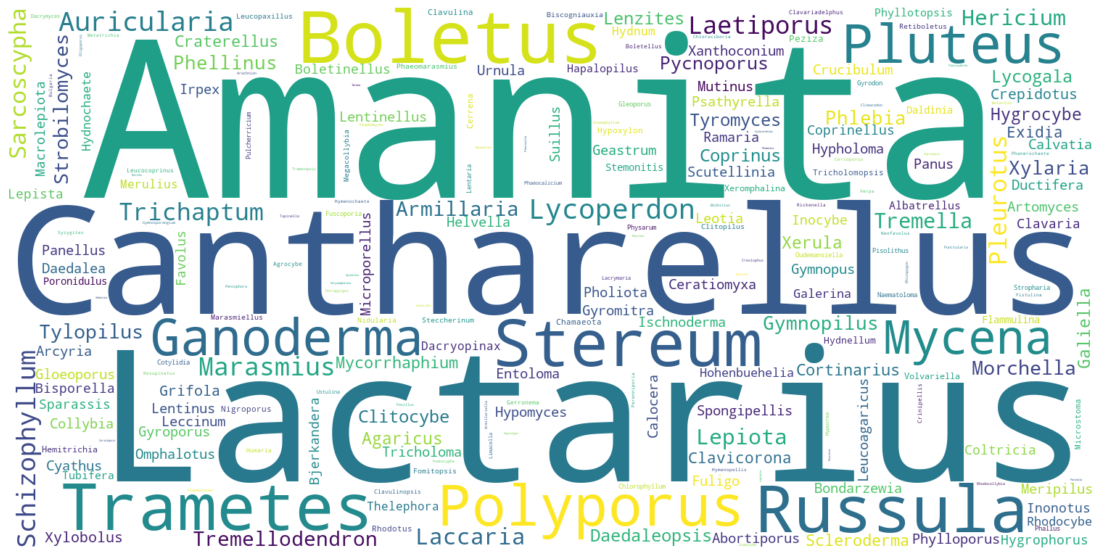

In [16]:
count_dict = {} #dict {each unique genus value : its count}
genus_list = [] #list of unique genus values


for each in mushrooms_df['genus']:
    if each not in genus_list:
        genus_list.append(each)

for item in genus_list:
    count_dict[item] = mushrooms_df['genus'].value_counts()[item]

wordcloud = WordCloud(background_color = 'white', max_words = 300, width=1500, height=750)

wordcloud.generate_from_frequencies(count_dict)
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.savefig('wordcloud.png')

plt.show() # word cloud shows most commonly found genus according to text size


## Summarize Your Results

With your EDA complete, answer the following questions.

1. Was there anything surprising about your dataset? 
2. Do you have any concerns about your dataset? 
3. Is there anything you want to make note of for the next phase of your analysis, which is cleaning data? 

1. The top 3 foray locations contain almost half of the total mushrooms found.

2. Running .value_counts() on 'foray_date' reveals that most mushrooms in our dataset were found in late summer (particularly September). One concern is that these numbers may simply reflect specific circumstances (e.g. date, number of attendees foraging) in which the Mushroom Society plans the foray, not necessarily actual times when mushrooms are most abundant. Also, the dataset has two columns - 'fungi_name' and 'current_fungi_name', where the latter indicates species whose identification may have changed. However, many of the mushrooms had missing/null values for 'current_fungi_name', and at least one value for 'current_fungi_name' is a float rather than a string. To incorporate the most useful data from both columns, I will need to impute values from 'fungi_name' to replace any missing/incorrect values in 'current_fungi_name'.

3. Dataset contains several columns that are either redundant or have no data relevant to the analysis; these columns can be dropped. Several columns also have missing entries - the data cleaning process will need to account for the missing data points.